In [1]:
# import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# bet of hands
BET_BANKER = "banker"
BET_PLAYER = "player"
BET_TIE = "tie"

# probability occurance of bet of hands
probability_banker = 45
probability_player = 45
probability_tie = 10
# payout ratio
win_payout = 1
tie_payout = 8
# 5% commission for the house
win_commission = 0.05
# each player's initial balance
initial_balance = 10000000

FIG_WIDTH = 16
FIG_HEIGHT = 10

'''
Two players bet on banker and player respectively with different amount
* 2 players play baccarat
* player 1 bet on banker with excessive amount more than player 2
* player 2 bet on player with way less amount
* the probability settings defined in cell "configuration settings"
* this test aims to evaluate the long term result after many rounds (>1000) of playing
'''


'\nTwo players bet on banker and player respectively with different amount\n* 2 players play baccarat\n* player 1 bet on banker with excessive amount more than player 2\n* player 2 bet on player with way less amount\n* the probability settings defined in cell "configuration settings"\n* this test aims to evaluate the long term result after many rounds (>1000) of playing\n'

In [2]:
class Player:
    def __init__(self, name, balance):
        self.name = name
        self.initial_amount = balance
        self.balance = balance
        self.bet = ""
        self.bet_amount = 0
    def place_bet(self, bet, amount):
        self.bet_hand = bet
        self.bet_amount = amount
    def pay_collect(self, result):
        win_loss = 0
        if self.bet_hand == "":
            # player did not bet, no win nor lose
            pass
        elif result == self.bet_hand:
            # player's bet win
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            elif result == BET_TIE:
                payout = tie_payout
            win = payout * self.bet_amount
            win_loss = win * (1 - win_commission)
        else:
            # player's bet losed
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            else:
                payout = 0
            win_loss = -1 * payout * self.bet_amount
        self.balance += win_loss
        return win_loss

class Baccarat:
    def __init__(self, player, probability_banker, probability_player, probability_tie):
        self.player = player
        self.probability_banker = probability_banker
        self.probability_player = probability_player
        self.probability_tie = probability_tie
        self.balance = 0
        self.bet_record = []
        self.record_index = 0
    def deal(self):
        num_random = random.randrange(0, 100)
        if num_random < self.probability_banker:
            result = BET_BANKER
        elif num_random < (self.probability_banker + self.probability_player):
            result = BET_PLAYER
        else:
            result = BET_TIE
        return result
    def conclude(self, result):
        profitloss = 0
        for i in player:
            win_loss = player[i].pay_collect(result)
            self.bet_record.append({"match": self.record_index, "result": result, "player": player[i].name, "winloss": win_loss})
            profitloss -= win_loss
        self.balance += profitloss
        self.bet_record.append({"match": self.record_index, "result": result, "player": "house", "winloss": profitloss})
        self.record_index += 1
    def print(self):
        print("result player winloss")
        for record in self.bet_record:
            print("{0} {1} {2}".format(record['result'], record['player'], record['winloss']))
    def df(self):
        df = pd.DataFrame.from_dict(self.bet_record)
        return df

def show_result(bet_record_df):
    # plot balanace
    display(HTML('<h3>All players cumulative balance</h3>'))
    df_winloss = bet_record_df[['match', 'player', 'winloss']]
    df = df_winloss.pivot(index=['match'], columns=['player'], values=['winloss'])
    df_cumsum_all = df.cumsum()
    df_cumsum_all.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    plt.show()
    # display(HTML('<h3>House cumulative balance</h3>'))
    # df_cumsum_1 = df_cumsum_all['winloss']['house']
    # df_cumsum_1.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    # plt.show()

    # show statistic
    display(HTML('<h3>Game result statistic</h3>'))
    display(HTML('<h4>Number of matches played</h4>'))
    player_group = bet_record_df.groupby('player')
    num_matches = player_group.get_group('house')['match'].count()
    print(num_matches)
    display(HTML('<h4>Percentage occurence of different result</h4>'))
    print(player_group.get_group('house').value_counts(['result'], normalize=True))
    display(HTML('<h4>Win-Loss after final match</h4>'))
    print(df_cumsum_all['winloss'].iloc[[-1]])
    display(HTML('<h4>Max draw-down</h4>'))
    print(df_cumsum_all['winloss'].min())


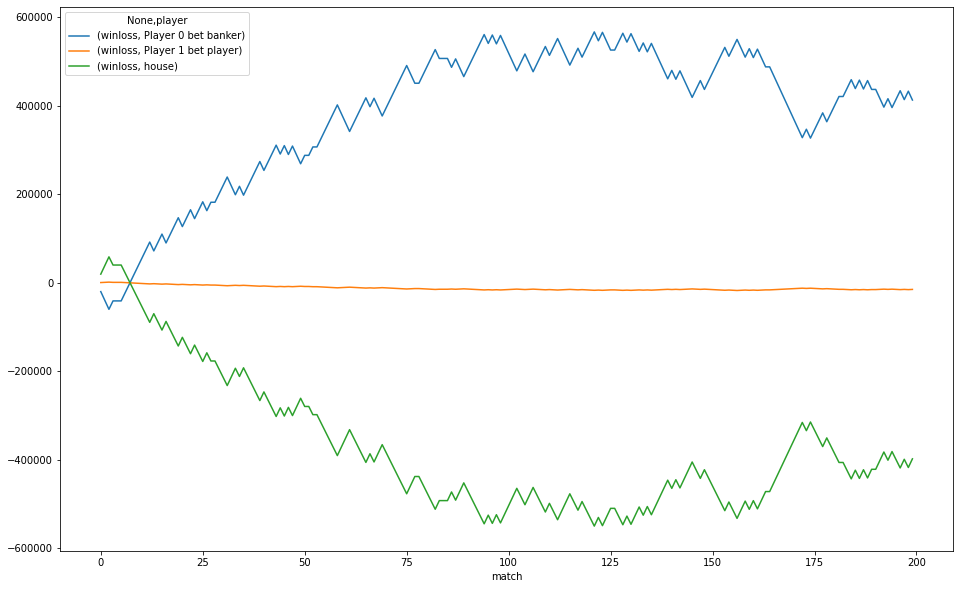

200


result
banker    0.535
player    0.405
tie       0.060
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                413000.0             -15025.0 -397975.0


player
Player 0 bet banker    -60000.0
Player 1 bet player    -17450.0
house                 -549975.0
dtype: float64


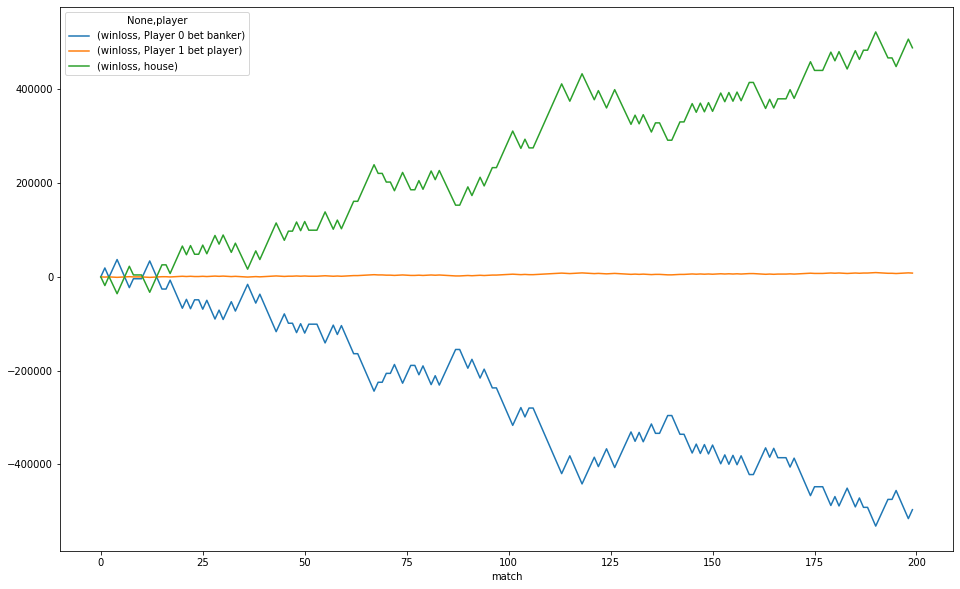

200


result
player    0.490
banker    0.385
tie       0.125
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -497000.0               8050.0  488950.0


player
Player 0 bet banker   -532000.0
Player 1 bet player     -1100.0
house                  -35975.0
dtype: float64


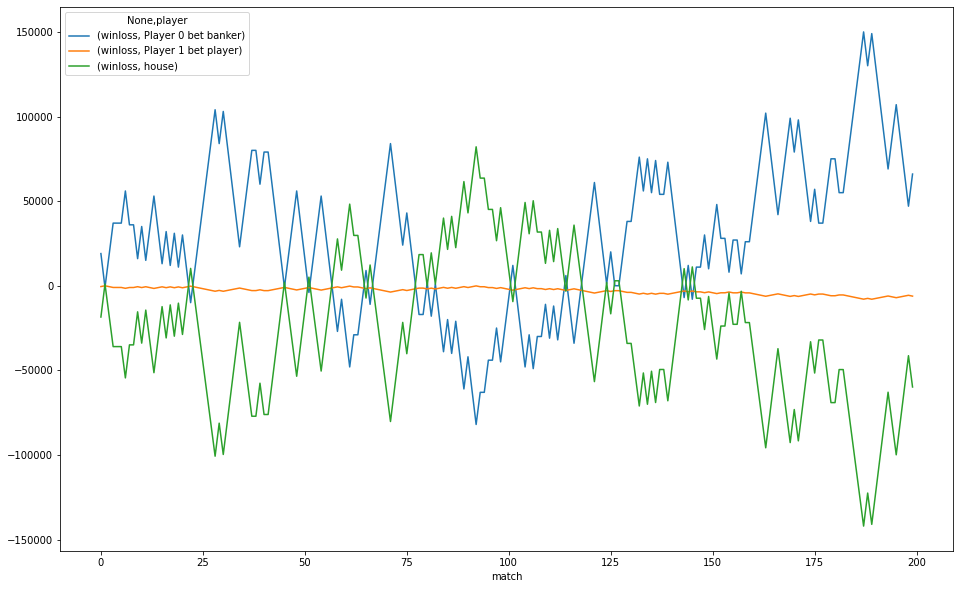

200


result
banker    0.47
player    0.43
tie       0.10
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                 66000.0              -6150.0 -59850.0


player
Player 0 bet banker    -82000.0
Player 1 bet player     -7975.0
house                 -142050.0
dtype: float64


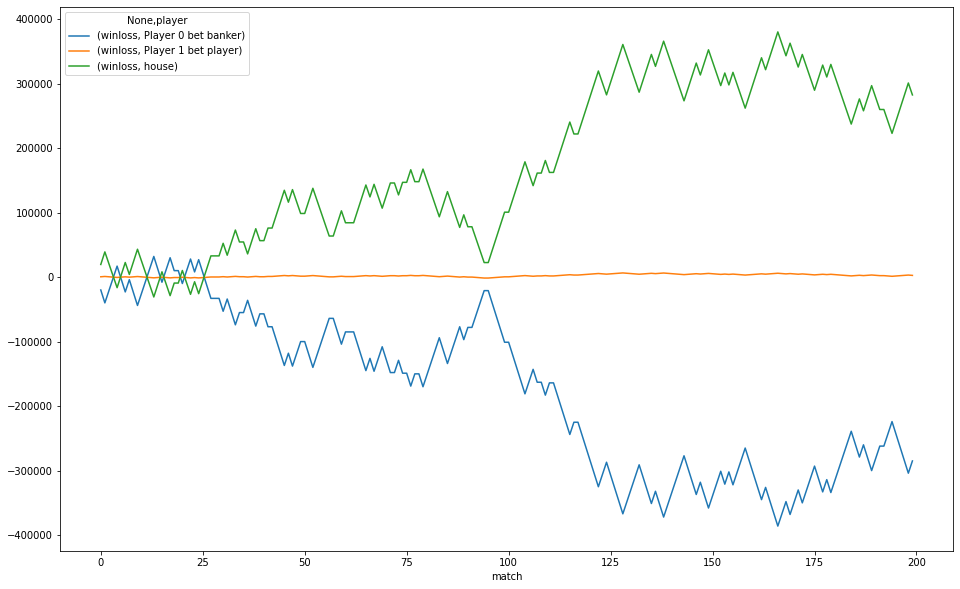

200


result
player    0.475
banker    0.425
tie       0.100
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -285000.0               2625.0  282375.0


player
Player 0 bet banker   -386000.0
Player 1 bet player     -1500.0
house                  -30850.0
dtype: float64


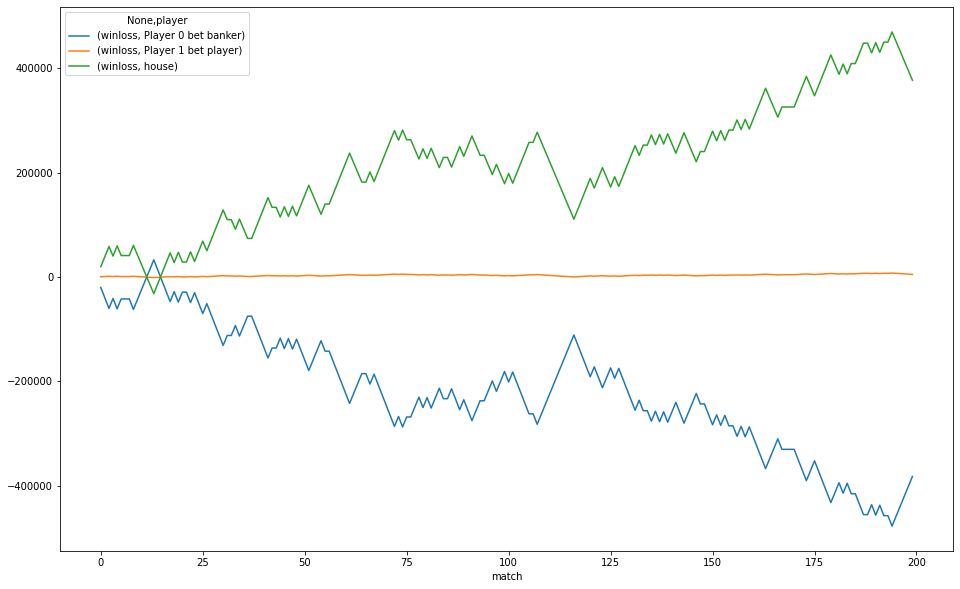

200


result
player    0.485
banker    0.410
tie       0.105
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -382000.0               5075.0  376925.0


player
Player 0 bet banker   -477000.0
Player 1 bet player     -1125.0
house                  -31875.0
dtype: float64


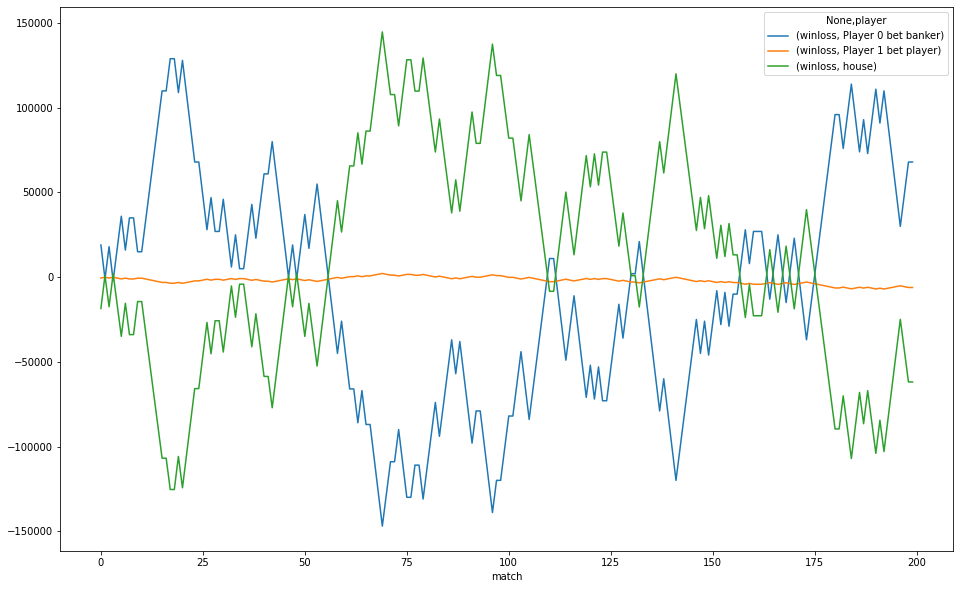

200


result
banker    0.46
player    0.42
tie       0.12
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                 68000.0              -6100.0 -61900.0


player
Player 0 bet banker   -147000.0
Player 1 bet player     -7000.0
house                 -125400.0
dtype: float64


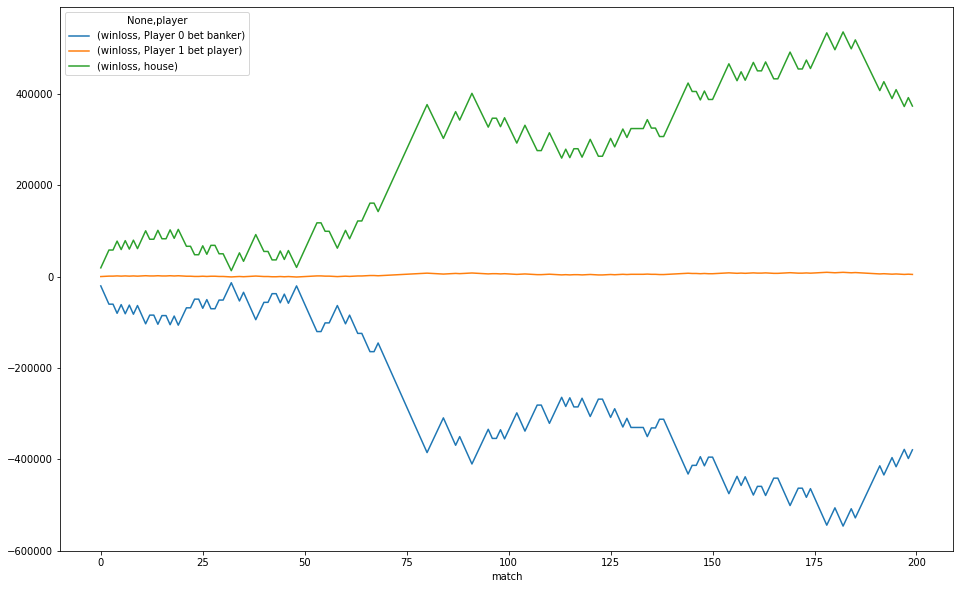

200


result
player    0.470
banker    0.395
tie       0.135
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -379000.0               5150.0  373850.0


player
Player 0 bet banker   -546000.0
Player 1 bet player      -500.0
house                   13325.0
dtype: float64


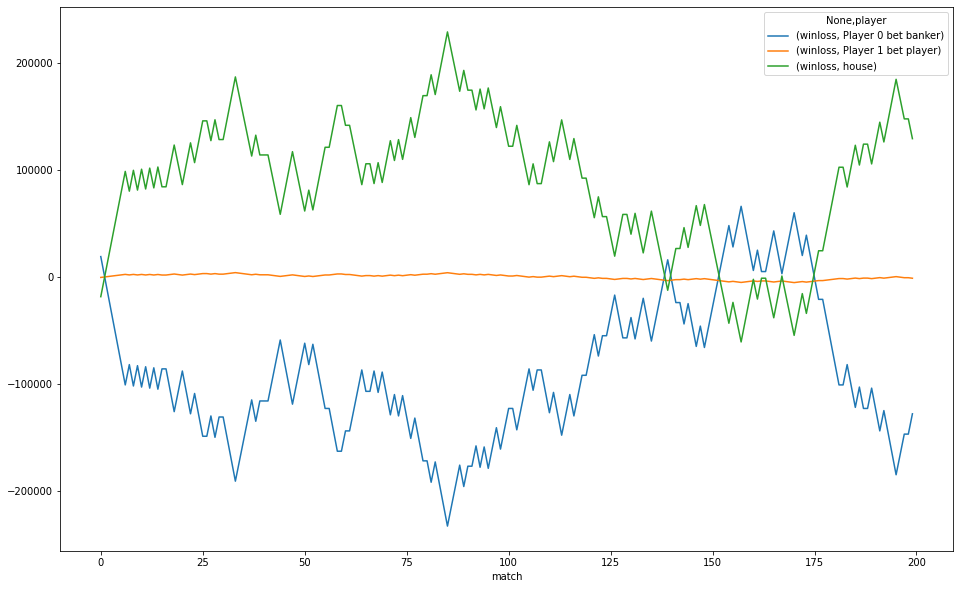

200


result
player    0.45
banker    0.44
tie       0.11
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -128000.0              -1250.0  129250.0


player
Player 0 bet banker   -233000.0
Player 1 bet player     -5325.0
house                  -60825.0
dtype: float64


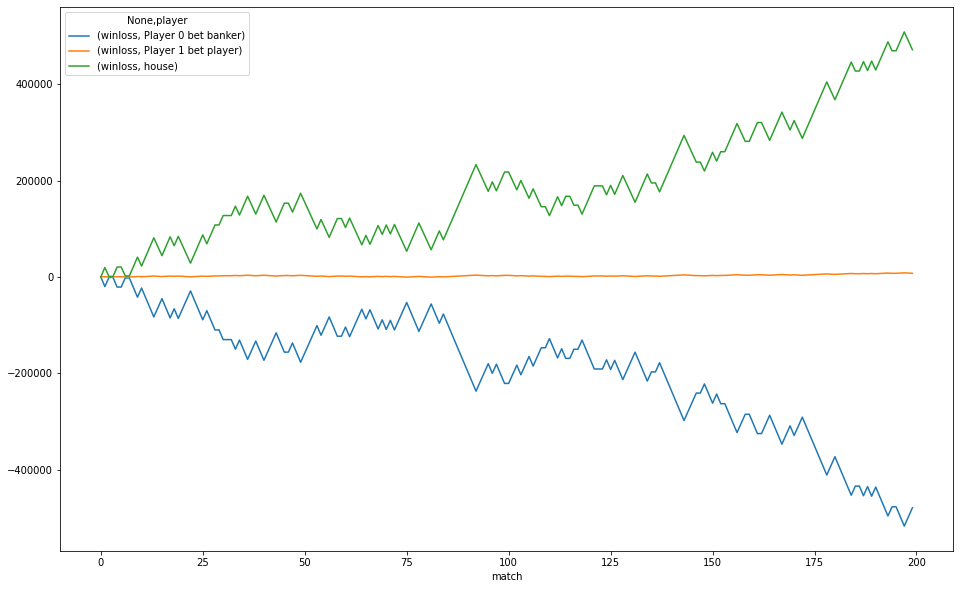

200


result
player    0.495
banker    0.395
tie       0.110
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -479000.0               7525.0  471475.0


player
Player 0 bet banker   -517000.0
Player 1 bet player      -425.0
house                       0.0
dtype: float64


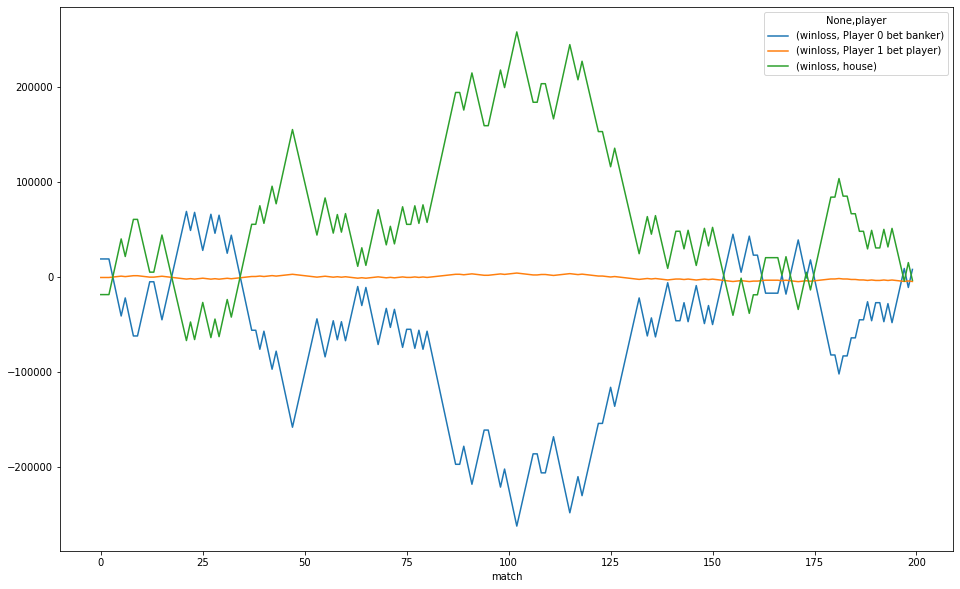

200


result
banker    0.460
player    0.435
tie       0.105
dtype: float64


player  Player 0 bet banker  Player 1 bet player   house
match                                                   
199                  8000.0              -4675.0 -3325.0


player
Player 0 bet banker   -262000.0
Player 1 bet player     -4875.0
house                  -66825.0
dtype: float64


In [3]:
# Test case 1
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# Conclusion
# * win-loss seems random
num_test = 10
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 1 - Two player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


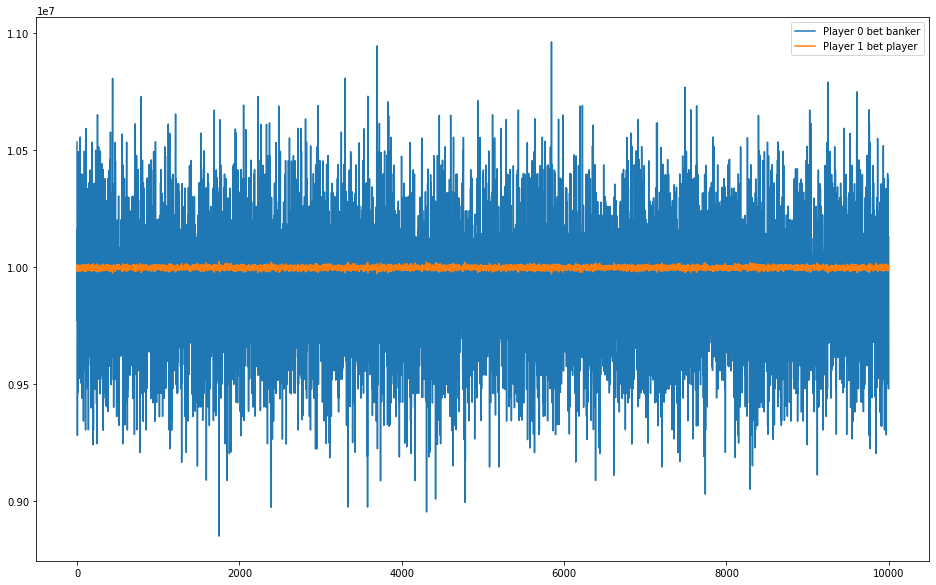

Player 0 bet banker  Player 1 bet player
count         1.000000e+04         1.000000e+04
mean          9.910048e+06         9.997749e+06
std           2.617670e+05         6.544208e+03
min           8.852000e+06         9.971400e+06
25%           9.734000e+06         9.993350e+06
50%           9.910000e+06         9.997750e+06
75%           1.008600e+07         1.000215e+07
max           1.096200e+07         1.002395e+07

In [4]:
# Test case 2
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# * increase the sample to very large to see if there is any pattern
num_test = 10 * 1000
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 2 - Two player different bet amount large samples:</h1>'))
playerWinLoss = []
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    test_result = {}
    for i in player:
        test_result[player[i].name] = player[i].balance
    playerWinLoss.append(test_result)
df = pd.DataFrame.from_dict(playerWinLoss)
df.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
df.describe()


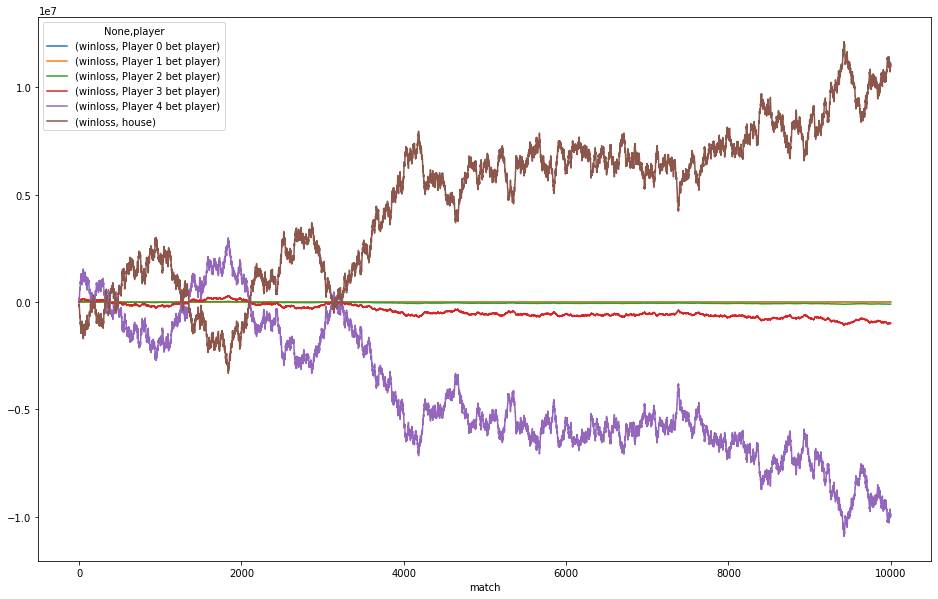

10000


result
player    0.4551
banker    0.4423
tie       0.1026
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                 -995.5              -9955.0             -99550.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999              -995500.0           -9955000.0  11061000.5  


player
Player 0 bet player       -1090.5
Player 1 bet player      -10905.0
Player 2 bet player     -109050.0
Player 3 bet player    -1090500.0
Player 4 bet player   -10905000.0
house                  -3322189.0
dtype: float64


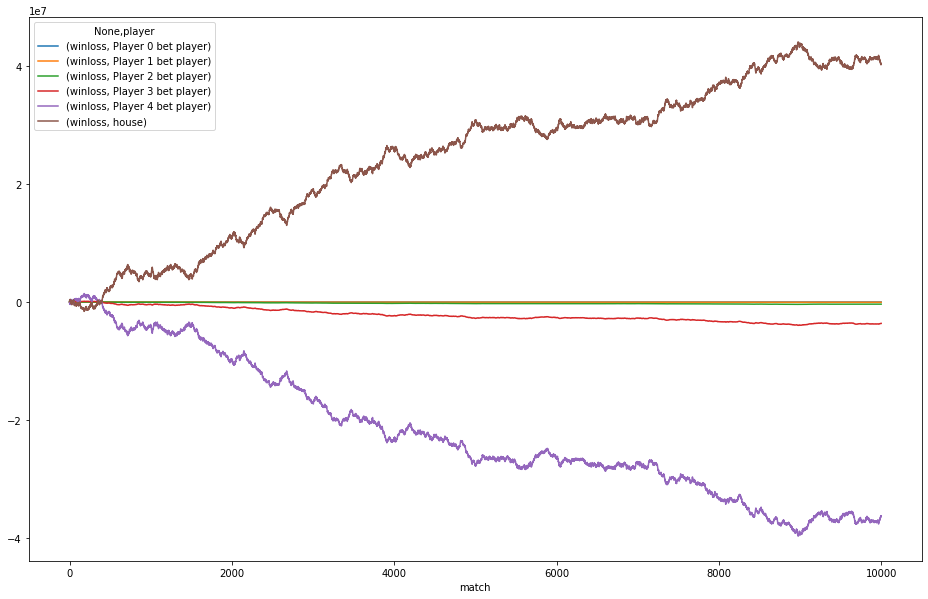

10000


result
banker    0.4582
player    0.4441
tie       0.0977
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -3630.5             -36305.0            -363050.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -3630500.0          -36305000.0  40338485.5  


player
Player 0 bet player       -3974.5
Player 1 bet player      -39745.0
Player 2 bet player     -397450.0
Player 3 bet player    -3974500.0
Player 4 bet player   -39745000.0
house                  -1594428.5
dtype: float64


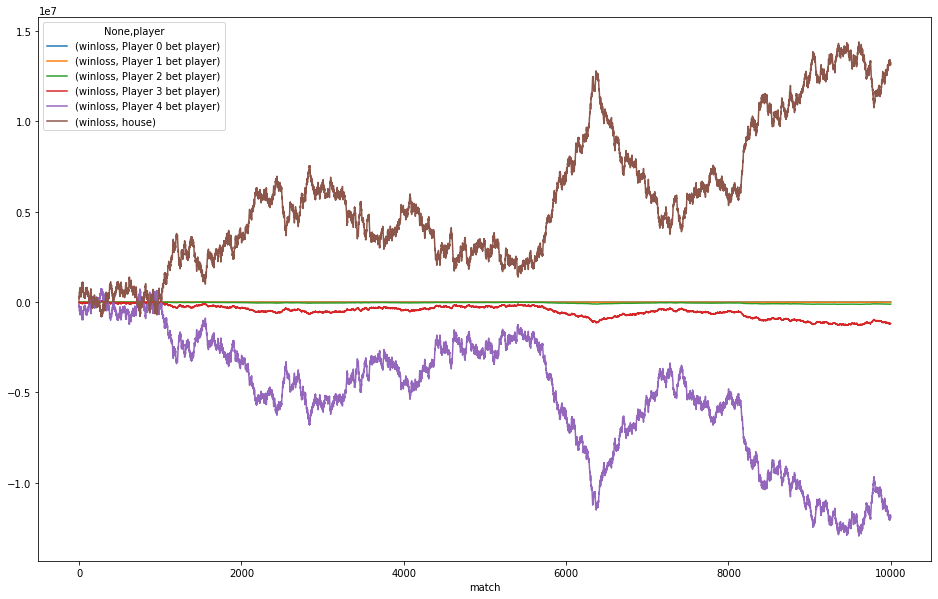

10000


result
player    0.4536
banker    0.4428
tie       0.1036
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1188.0             -11880.0            -118800.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1188000.0          -11880000.0  13199868.0  


player
Player 0 bet player       -1293.5
Player 1 bet player      -12935.0
Player 2 bet player     -129350.0
Player 3 bet player    -1293500.0
Player 4 bet player   -12935000.0
house                   -811103.0
dtype: float64


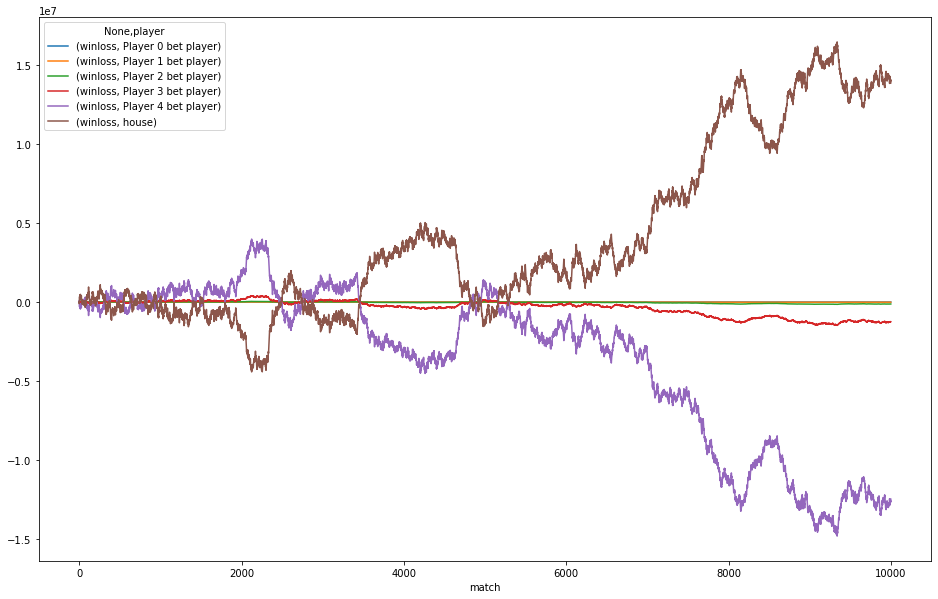

10000


result
player    0.4554
banker    0.4451
tie       0.0995
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1247.0             -12470.0            -124700.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1247000.0          -12470000.0  13855417.0  


player
Player 0 bet player       -1480.5
Player 1 bet player      -14805.0
Player 2 bet player     -148050.0
Player 3 bet player    -1480500.0
Player 4 bet player   -14805000.0
house                  -4422178.0
dtype: float64


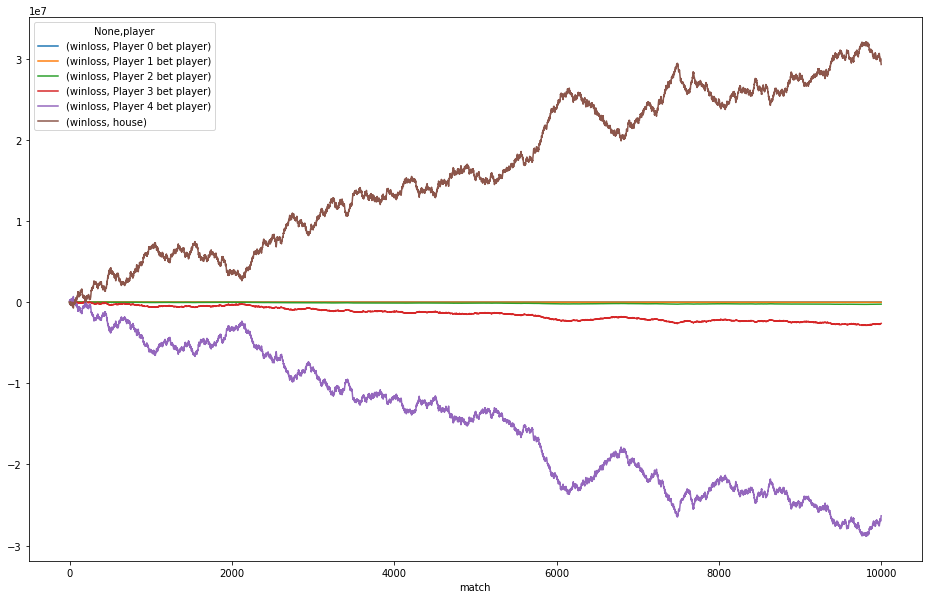

10000


result
banker    0.4527
player    0.4488
tie       0.0985
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2634.0             -26340.0            -263400.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2634000.0          -26340000.0  29266374.0  


player
Player 0 bet player       -2884.0
Player 1 bet player      -28840.0
Player 2 bet player     -288400.0
Player 3 bet player    -2884000.0
Player 4 bet player   -28840000.0
house                   -749992.5
dtype: float64


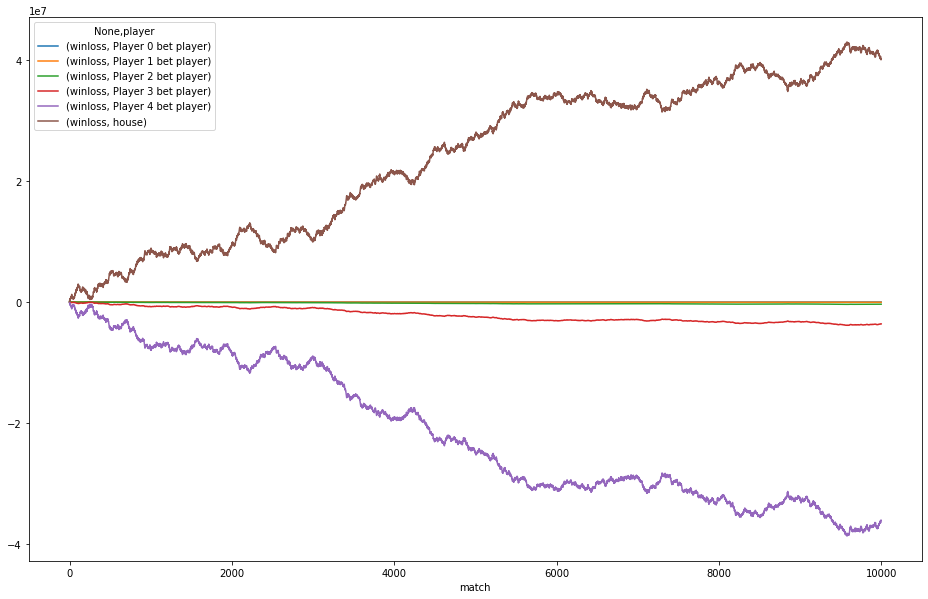

10000


result
banker    0.4561
player    0.4420
tie       0.1019
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -3620.0             -36200.0            -362000.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -3620000.0          -36200000.0  40221820.0  


player
Player 0 bet player       -3876.5
Player 1 bet player      -38765.0
Player 2 bet player     -387650.0
Player 3 bet player    -3876500.0
Player 4 bet player   -38765000.0
house                    111110.0
dtype: float64


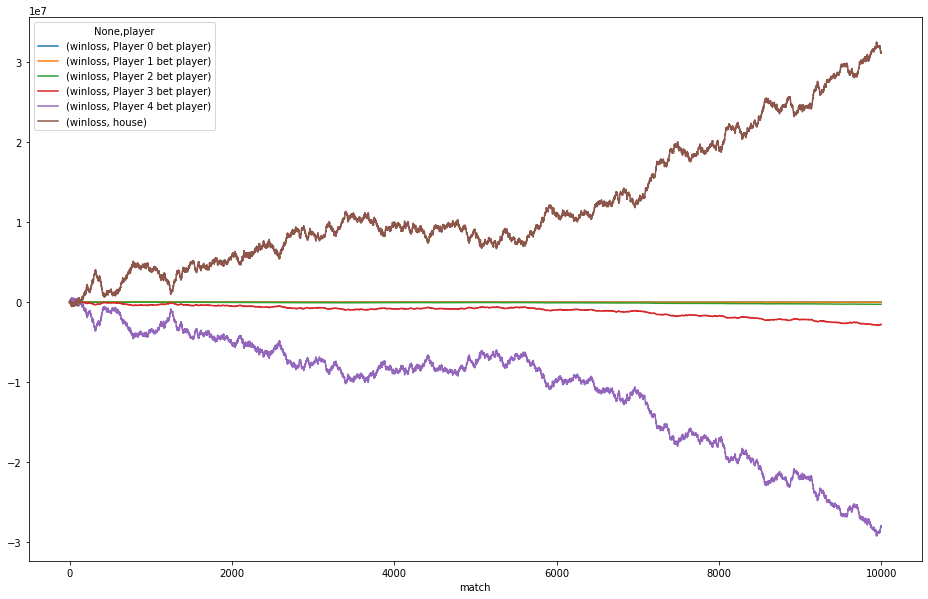

10000


result
banker    0.4507
player    0.4449
tie       0.1044
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2804.5             -28045.0            -280450.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2804500.0          -28045000.0  31160799.5  


player
Player 0 bet player       -2928.5
Player 1 bet player      -29285.0
Player 2 bet player     -292850.0
Player 3 bet player    -2928500.0
Player 4 bet player   -29285000.0
house                   -577772.0
dtype: float64


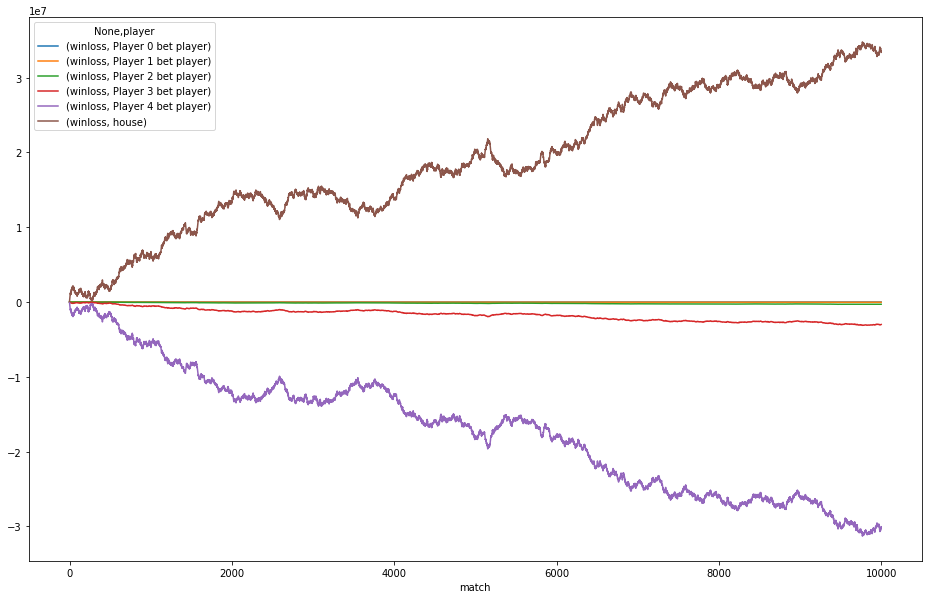

10000


result
banker    0.4525
player    0.4447
tie       0.1028
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -3003.5             -30035.0            -300350.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -3003500.0          -30035000.0  33371888.5  


player
Player 0 bet player       -3129.0
Player 1 bet player      -31290.0
Player 2 bet player     -312900.0
Player 3 bet player    -3129000.0
Player 4 bet player   -31290000.0
house                    111110.0
dtype: float64


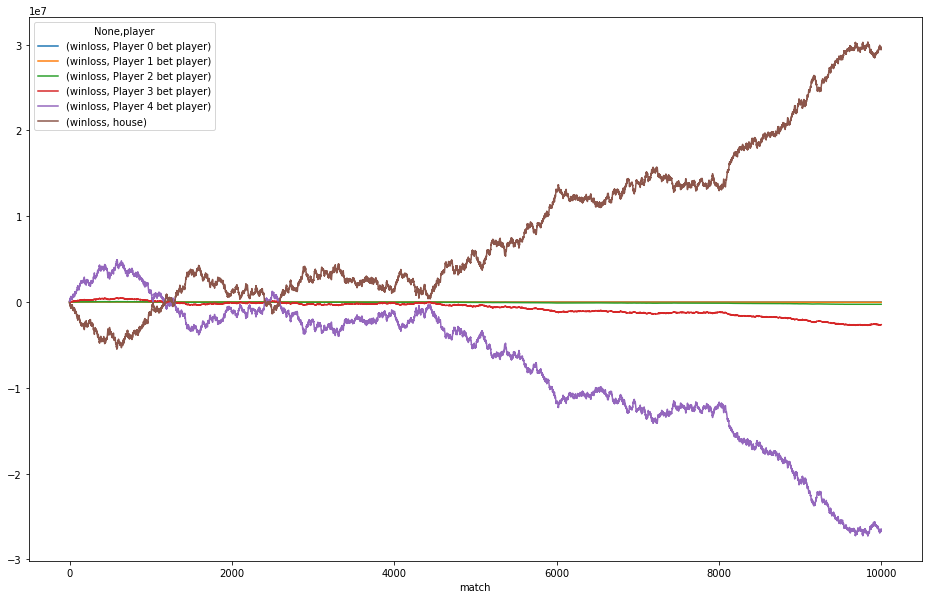

10000


result
banker    0.4521
player    0.4480
tie       0.0999
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2650.0             -26500.0            -265000.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2650000.0          -26500000.0  29444150.0  


player
Player 0 bet player       -2729.5
Player 1 bet player      -27295.0
Player 2 bet player     -272950.0
Player 3 bet player    -2729500.0
Player 4 bet player   -27295000.0
house                  -5472167.5
dtype: float64


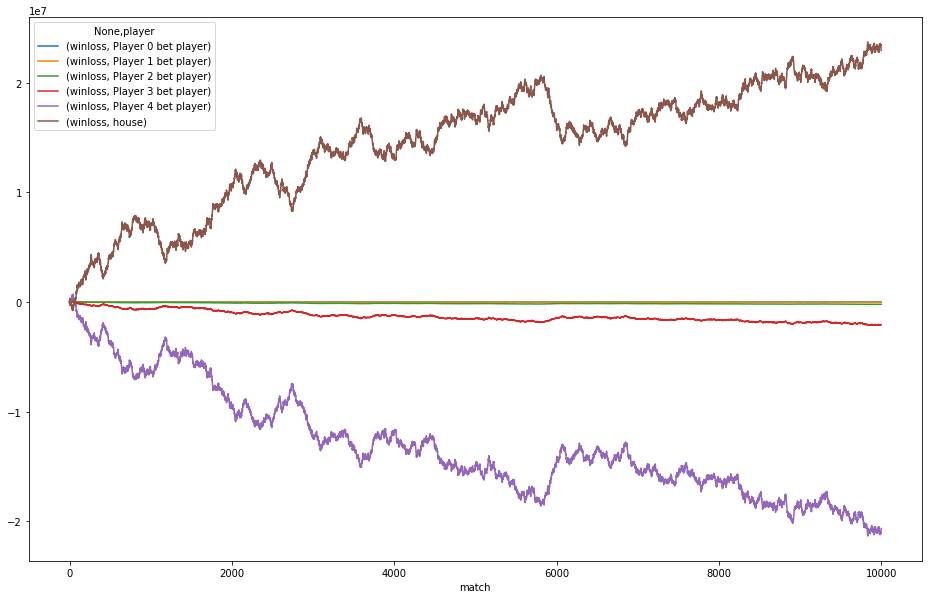

10000


result
player    0.4514
banker    0.4495
tie       0.0991
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2067.0             -20670.0            -206700.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2067000.0          -20670000.0  22966437.0  


player
Player 0 bet player       -2136.0
Player 1 bet player      -21360.0
Player 2 bet player     -213600.0
Player 3 bet player    -2136000.0
Player 4 bet player   -21360000.0
house                   -777770.0
dtype: float64


In [5]:
# Test case 3
# * define many players and their bet hand and amount
# * each player's bet amount is different in order to show their relationship
# Conclusion
num_test = 10
num_matches = 10000
bets = [
    {'bet': BET_PLAYER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 100},
    {'bet': BET_PLAYER, 'amount': 1000},
    {'bet': BET_PLAYER, 'amount': 10000},
    {'bet': BET_PLAYER, 'amount': 100000},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 3 - Different player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


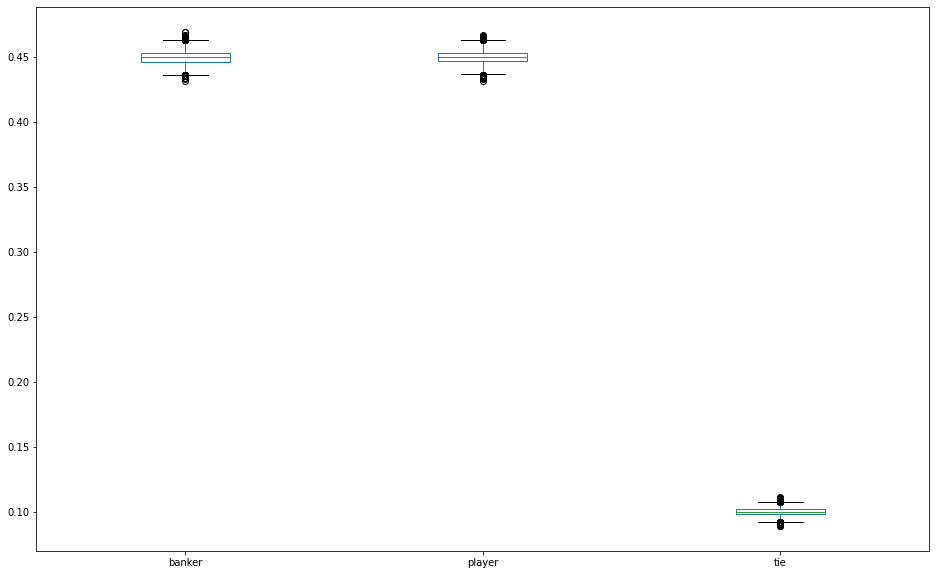

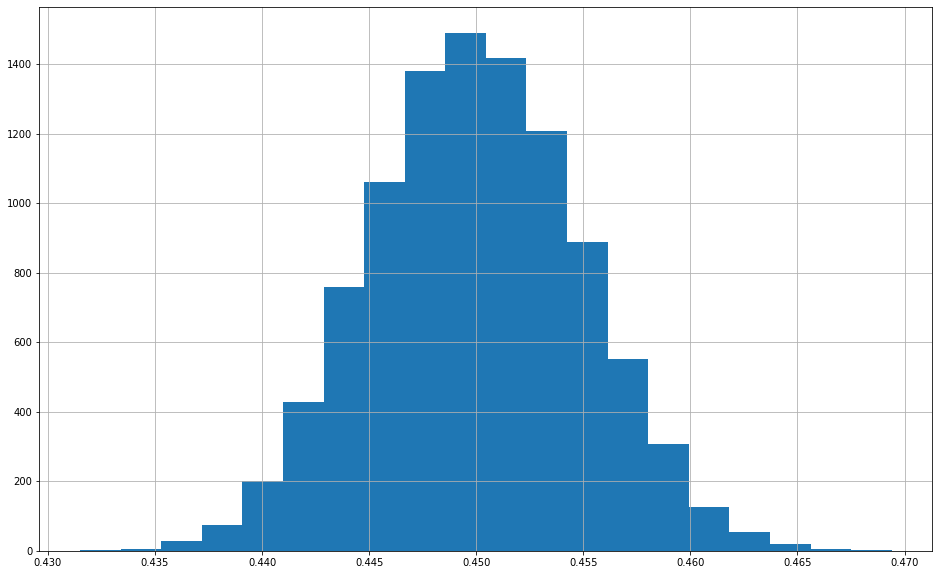

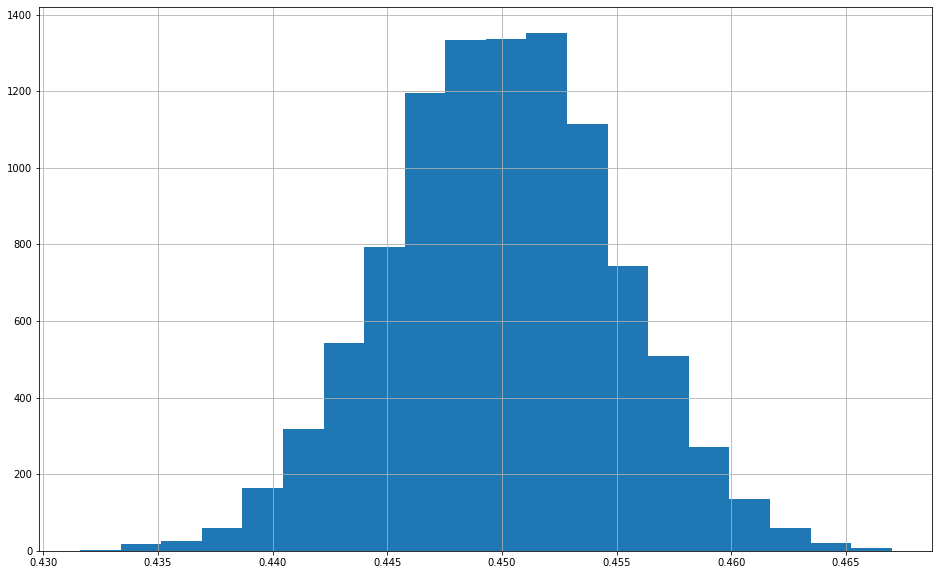

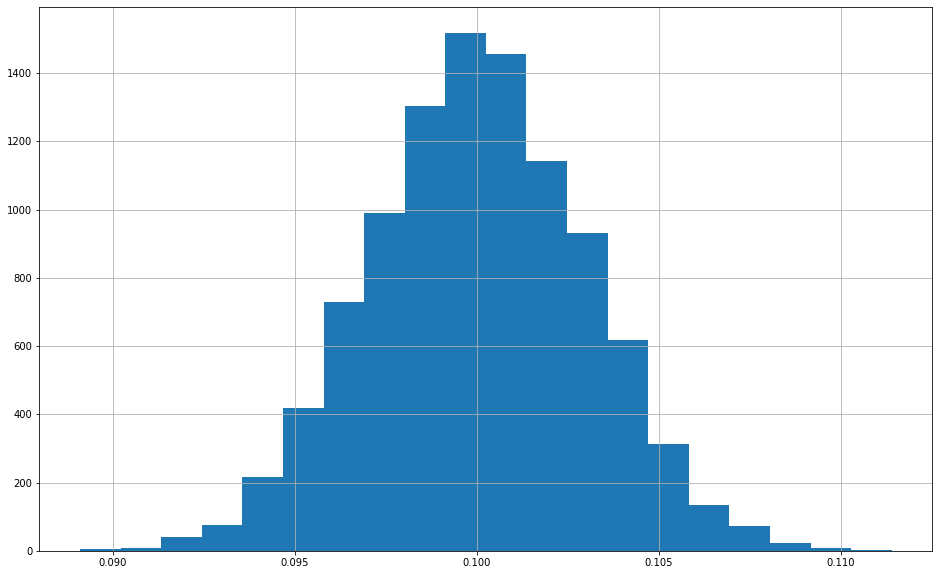

             banker        player           tie
count  10000.000000  10000.000000  10000.000000
mean       0.449942      0.450020      0.100038
std        0.004918      0.004947      0.002950
min        0.431500      0.431600      0.089100
25%        0.446600      0.446700      0.098100
50%        0.449900      0.450100      0.100000
75%        0.453300      0.453400      0.102000
max        0.469400      0.467000      0.111400


In [6]:
# Test case 4
# * test the error rate with defined sample size
num_test = 10 * 1000
num_matches = 10 * 1000
bets = [
    {'bet': BET_BANKER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 10},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 4 - Sample size variation:</h1>'))
display(HTML('<p>Number of test: {0}</p>'.format(num_test)))
display(HTML('<p>Samples size: {0}</p>'.format(num_matches)))
results_df = pd.DataFrame()
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    results = []
    for i in range(num_matches):
        result = baccarat.deal()
        results.append(result)
    result_df = pd.DataFrame(data=results, columns=['result'])
    result_value_counts = result_df['result'].value_counts(normalize=True)
    results_df = results_df.append(result_value_counts, ignore_index=True)
results_df.plot.box(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
results_df[BET_BANKER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_PLAYER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_TIE].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
print(results_df.describe())


In [7]:
display(HTML('<h1>All tests finished.</h1>'))
